## Problem Statement:
Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams.

* You have historical data from previous applicants that you can use as a training set for logistic regression.
* For each training example, you have the applicant’s scores on two exams and the admissions decision.
* Your task is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams.

## Solution :

### Importing Necessary Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Implementing Necessary functions

***1. Sigmoid_function: $f(z)= 1 / (1 + e^{-z})$***

In [5]:
def sigmoid(z):
    res = 0.0
    res = 1 / (1 + np.exp(-z))

    return res

***2. compute_cost: useful for determining the cost at each step***

In [6]:
def compute_cost (X, y, w, b):

    m = X.shape[0] # m = no of training examples
    cost = 0.0

    for i in range (m):
        z_i = np.dot(w, X[i]) + b
        f_wb = sigmoid(z_i)
        
        cost = cost + (y[i] * np.log(f_wb)) + ((1 - y[i]) * np.log(1 - f_wb))

    cost = -cost / m

    return cost

***3. compute_gradient: this function is used to find the derivatives dj_dw and dj_db***

In [7]:
def compute_gradient(X, y, w, b):
    # m = no of training example, n = no of features
    m, n = X.shape

    dj_dw = np.zeros(n, )
    dj_db = 0.0

    for i in range(m):
        z_i = np.dot(w, X[i]) + b
        f_wb = sigmoid(z_i)

        err = f_wb - y[i]

        dj_db = dj_db + err

        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

***4. run_gradient_descent: this function simultaneously update w and b to find the best value of w and b***

In [66]:
def run_gradient_descent(X, y, w_in, b_in, alpha, no_of_iterations):

    m, n = X.shape
    w = w_in
    b = b_in

    J_history = []

    for i in range (no_of_iterations):
        # compute gradient
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        # update parameters w and b
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # compute cost for updated parameters
        cost = compute_cost(X, y, w, b)

        # store the cost
        if (i < no_of_iterations):
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if (i % math.ceil(no_of_iterations / 10) == 0 or i == (no_of_iterations - 1)):
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")


    return w, b, J_history

## Main Function Starts From Here

***Step 1: Load the text file***

In [9]:
# load the text file
data = np.loadtxt("data.txt", delimiter = ',')
# feature = first two columns
X_train = data[:, :2]
# target = third column
y_train = data[:, 2]

***Checking the datatype and first 5 elements of features and targets***

In [10]:
print("Type of X_train is: ", type(X_train))
print("First 5 elements of X_train is: \n", X_train[:5])

Type of X_train is:  <class 'numpy.ndarray'>
First 5 elements of X_train is: 
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]


In [11]:
print("Type of y_train is: ", type(y_train))
print("First 5 elements of y_train is: \n", y_train[:5])

Type of y_train is:  <class 'numpy.ndarray'>
First 5 elements of y_train is: 
 [0. 0. 0. 1. 1.]


In [12]:
# dimension of features and targets
print("Dimensions of X_train is: ", X_train.shape)
print("Dimensions of y_train is: ", y_train.shape)
print("Number of training example: m = ", X_train.shape[0])

Dimensions of X_train is:  (100, 2)
Dimensions of y_train is:  (100,)
Number of training example: m =  100


***Step 2: Visualize the dataset***

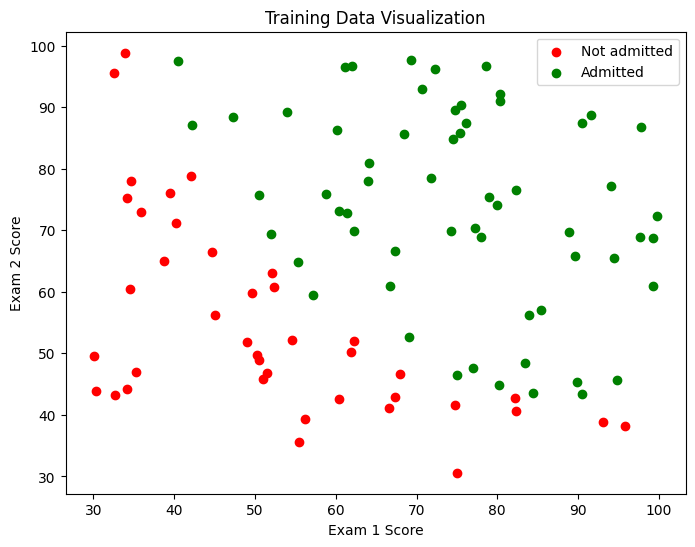

In [13]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
#
positive = y_train == 1
negative = y_train == 0
# Plot negative class
plt.scatter(X_train[negative][:, 0], X_train[negative][:, 1], color = 'r',label = 'Not admitted')

# Plot positive class
plt.scatter(X_train[positive][:, 0], X_train[positive][:, 1], color='g', label='Admitted')

# Adding labels and title
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Training Data Visualization')
plt.legend()

# Show plot
plt.show()

# comments:
# X_train[y_train == 0][:, 0] selects the first feature of all samples belonging to class 0.
# X_train[y_train == 0][:, 1] selects the second feature of all samples belonging to class 0.

***Step 3: initialize the parameters***

In [102]:
m, n = X_train.shape

np.random.seed(1)
w_init = np.zeros(n, )
b_init = -8

alpha = 0.001
no_of_iterations = 100000

***Step 4: run gradient descent to find the best value of w and b***

In [103]:
w_final, b_final, J_history = run_gradient_descent(X_train, y_train, w_init, b_init, alpha, no_of_iterations)

print(w_final)
print(b_final)

Iteration    0: Cost     1.01   
Iteration 10000: Cost     0.30   
Iteration 20000: Cost     0.30   
Iteration 30000: Cost     0.30   
Iteration 40000: Cost     0.29   
Iteration 50000: Cost     0.29   
Iteration 60000: Cost     0.29   
Iteration 70000: Cost     0.28   
Iteration 80000: Cost     0.28   
Iteration 90000: Cost     0.28   
Iteration 99999: Cost     0.28   
[0.08281276 0.07653265]
-9.663206862378448


***Step 5: Cost vs Iterations, this plot help us to understand if the gradient descent is working properly***

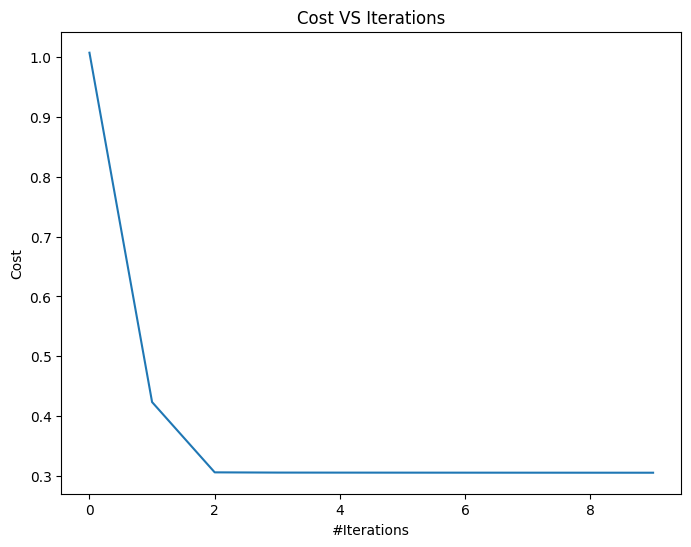

In [104]:
# plot cost vs iterations
plt.figure(figsize = (8, 6))

plt.plot(J_history[:10])

# labeling
plt.title("Cost VS Iterations")
plt.ylabel("Cost")
plt.xlabel("#Iterations")

# to show the plot
plt.show()

***Step 6: Plotting Decision Boundary***

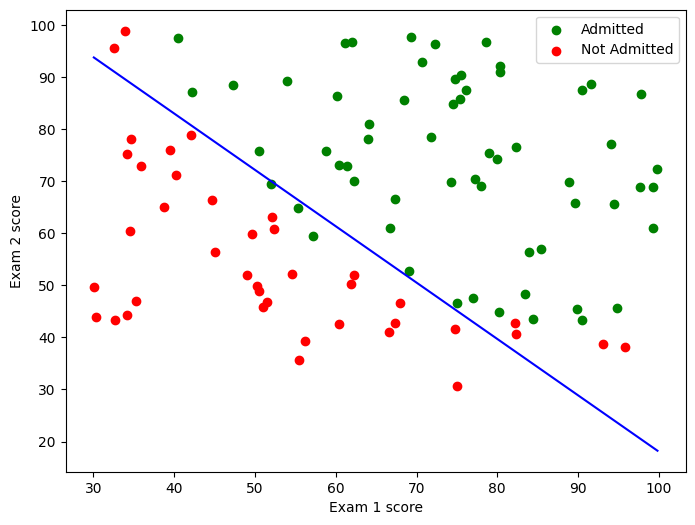

In [105]:
# identifying positive and negative examples
positive = y_train == 1
negative = y_train == 0

# setting the size
plt.figure(figsize = (8, 6))
# Plotting the data points
plt.scatter(X_train[positive][:, 0], X_train[positive][:, 1], color = 'g', label = 'Admitted')
plt.scatter(X_train[negative][:, 0], X_train[negative][:, 1], color = 'r', label = 'Not Admitted')

# plotting decision boundary for 2d data
if X_train.shape[1] <= 2:
    # define the range for the x-axis, from the minimum to the maximum value in the first column of X.
    plot_x = np.array([min(X_train[:, 0]), max(X_train[:, 0])])
    # calculates corresponding y values using decision boundary formula
    # w_1 * x + w_2 * y + b = 0
    # y = (-1 / w_2) * (w_1 * x + b)
    plot_y = (-1 / w_final[1]) * (w_final[0] * plot_x + b_final)

    plt.plot(plot_x, plot_y, color = 'b')

# labeling
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

plt.legend()
# show the plot
plt.show()

***Step 7: Make Prediction***
* First we need to calculate the value of $f(x^{(i)}) = g(z) = 1 / (1 + e^{-z})$ where $z = w. x^{(i)} + b$
* We interpret the output of the model $𝑓(𝑥^{(i)})$ as the probability that  $𝑦^{(i)} = 1$; given  $x^{(i)}$ and parameterized by  𝑤
* To get a final prediction ($y^{(i)} = 0$ or $y^{(i)} = 1$) from the logistic regression model, we can use the following heuristic -

    * if  $f(x^{(i)}) >= 0.5$, predict  $y^{(i)} = 1$
    * if  $f(x^{(i)}) < 0.5$, predict  $y^{(i)} = 0$

In [106]:
def predict(X_sample, w, b):
    
    m, n = X_sample.shape
    p = np.zeros(m, )  # store predictions 

    for i in range (m):
        z_i = np.dot(w, X_sample[i]) + b
        f_wb_i = sigmoid(z_i)

        if (f_wb_i >= 0.5):
            p[i] = 1
        else:
            p[i] = 0

    return p

##### Let, we want to predict two students admission situation where first student marks are [20, 80] and second student marks are [70, 60]

In [108]:
X_sample = np.array([[20, 80],
                [70, 60]])

p = predict(X_sample, w_final, b_final)
print(p)


[0. 1.]


***Step 8: Determining Training Accuracy***

In [109]:
# store prediction for all training example using optimised parameters w and b
p = predict(X_train, w_final, b_final)
# calculating accuracy
print(f'Train Accuracy: {(np.mean(p == y_train) * 100)}')

Train Accuracy: 91.0
